In [ ]:
# Installation of MDFT_nn needed
!pip install git+https://github.com/Rahgooy/MDFT.git@master

In [3]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvas
from scipy.spatial import distance
import random
random.seed(123)

import pickle
from scipy import stats

import bokeh


# allow us to re-use the framework from the src directory
import sys, os
sys.path.append(os.path.abspath(os.path.join('../')))

import max_ent.examples.grid_9_by_9 as G
from max_ent.utility.support import *
from max_ent.gridworld import Directions



np.random.seed(123)

Set of constraints

In [131]:
## Set the grid
blue = [21,  9, 59,  1,  0, 20]
green = [42, 18, 76, 41, 23, 30]
#cs = [63, 74, 13, 39, 48, 38]
cs = [74, 13, 39, 48, 38]
ca = [Directions.DOWN_LEFT, Directions.UP_LEFT]
start =16
goal = 63
constraints = {'blue': blue, 'green': green, 'cs':cs, 'ca':ca}

To generate random trajectories, you can use functions in max_ent/algorithms/gridworld_icrl.py there you can find procedures to generate random, optimal, and weighted trajectroies.


Generate nominal trajectories and plot them in the grid

[0.962 0.062 0.062 0.962 0.962 0.062 0.962 0.963]
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x1103bf400>}


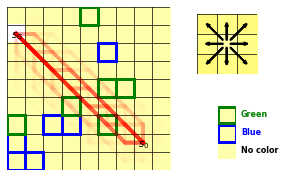

In [132]:
#blue, green, cs, ca, start, goal = generate_constraints(9)
n, n_cfg, demo_n, f1 = create_world('Nominal', blue, green, start=start, goal=goal)

Generate constrained trajectories and plot them in the grid. 
It is possible to change the set of constraints and generate a new set of trajectories with the following:
    
n_cfg = G.config_world(blue, green, cs, ca, cc, goal, start=start)

n = n_cfg.mdp

demo = G.generate_trajectories(n.world, n.reward, n.start, n.terminal, n_trajectories=1)

[0.962 0.062 0.062 0.962 0.962 0.062 0.962 0.963]
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x1103bf400>}


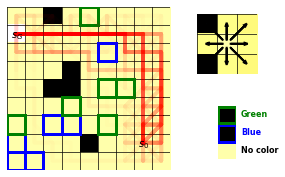

In [133]:
cc = [1, 2]
c, c_cfg, demo_c, f2 = create_world('Constrained', blue, green, cs, ca, cc, start=start, goal=goal, check=True)

When you generate a set of trajectories, those are stored in a tuple (i.e., demo_c in this case) where the first element is the set of trajectories and the second element is the policy used to generate the trajectory.

The grid world is an object having functions to compute coords in the grid given the number of the state and vice-versa. You can find the code in max_ent/gridworld/gridworld.py (e.g., state_point_to_index(self, state)). Looking at the code it is possible to see that the first element of the trajectories list is the bottom-left state in the grid.

The list of the actions are stored in the class Directions that is in max_ent/gridworld/gridworld.py 

In [5]:
demo_n.policy

array([[7.59928542e-02, 1.04839966e-01, 5.20621257e-01, 7.59928542e-02,
        1.71067049e-02, 1.71232955e-01, 1.71067049e-02, 1.71067049e-02],
       [5.36229004e-02, 8.16202664e-02, 5.36749053e-01, 7.39783115e-02,
        8.26976271e-02, 1.38025417e-01, 1.66532124e-02, 1.66532124e-02],
       [6.62955632e-02, 6.45972892e-02, 5.49471928e-01, 7.31438907e-02,
        1.08279177e-01, 1.05281399e-01, 1.64653765e-02, 1.64653765e-02],
       [8.39788812e-02, 5.25197247e-02, 5.36970053e-01, 7.41662498e-02,
        1.42013995e-01, 7.69600581e-02, 1.66955191e-02, 1.66955191e-02],
       [1.08881066e-01, 4.46185770e-02, 5.01900725e-01, 7.71025045e-02,
        1.77455604e-01, 5.53285286e-02, 1.73564976e-02, 1.73564976e-02],
       [1.41702804e-01, 4.00565827e-02, 4.51715998e-01, 8.20022323e-02,
        2.07644958e-01, 3.99584796e-02, 1.84594723e-02, 1.84594723e-02],
       [1.82077115e-01, 3.88893997e-02, 3.94135030e-01, 8.89413228e-02,
        2.25781716e-01, 3.01323635e-02, 2.00215268e-02, 2.

The following code generates an empty set of trajetories so it is possible to plot the constrained grid re-using the existing code. It also saves to pickle files the two sets of policies.

{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x10dbd8320>}


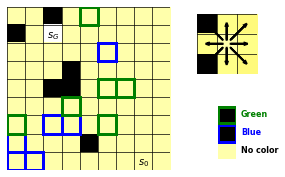

In [6]:
from max_ent.algorithms.gridworld_icrl import Demonstration
demo_test = Demonstration([], demo_c.policy)

import pickle as pkl
import numpy as np

fileName = 'qvalues_constraints'
fileObject = open(fileName, 'wb')
pkl.dump(demo_c.policy, fileObject)
fileObject.close()

fileName = 'qvalues_nominal'
fileObject = open(fileName, 'wb')
pkl.dump(demo_n.policy, fileObject)
fileObject.close()

f1 = G.plot_world(f'MCA', c, c_cfg.state_penalties, 
              c_cfg.action_penalties, c_cfg.color_penalties, 
              demo_test, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)

Load values from pickle

In [7]:
import pickle 
import numpy as np

with open('qvalues_constraints', 'rb') as f:
    policy_c = pickle.load(f)
    
with open('qvalues_nominal', 'rb') as f:
    policy_n = pickle.load(f)

Generate figure for each state in the grid. DISABLED, not required

In [8]:
'''for i, (q_value_n, q_value_c) in enumerate(zip(policy_n,policy_c)):
    #print(n.world.state_index_to_point(i))
    coord = n.world.state_index_to_point(i)
    f1 = G.plot_world(f'MCA', c, c_cfg.state_penalties, 
              c_cfg.action_penalties, c_cfg.color_penalties, 
              demo_test, c_cfg.blue, c_cfg.green, red_states=[i], vmin=-50, vmax=10)
    print(i, Directions.ALL_DIRECTIONS[np.argmax(q_value_n)], Directions.ALL_DIRECTIONS[np.argmax(q_value_c)])
    f1.savefig(f'visuals/state{coord[1]}{coord[0]}.png')
    #break'''

"for i, (q_value_n, q_value_c) in enumerate(zip(policy_n,policy_c)):\n    #print(n.world.state_index_to_point(i))\n    coord = n.world.state_index_to_point(i)\n    f1 = G.plot_world(f'MCA', c, c_cfg.state_penalties, \n              c_cfg.action_penalties, c_cfg.color_penalties, \n              demo_test, c_cfg.blue, c_cfg.green, red_states=[i], vmin=-50, vmax=10)\n    print(i, Directions.ALL_DIRECTIONS[np.argmax(q_value_n)], Directions.ALL_DIRECTIONS[np.argmax(q_value_c)])\n    f1.savefig(f'visuals/state{coord[1]}{coord[0]}.png')\n    #break"

Define function for removing impossible actions for a state. Meaning that state on the border of the grid cannot have move taking an agent outside the grid

In [9]:
border_bottom = [0,1,2,3,4,5,6,7,8]
border_top = [72,73,74,75,76,77,78,79,80]
border_left =[0,9,18,27,36,45,54,63,72]
border_right = [8,17,26,35,44,53,62,71,80]

#print(Directions.ALL_DIRECTIONS)

def remove_actions(state):
    list_act = []
    if state in border_bottom:
        list_act.append(7)
        list_act.append(6)
        list_act.append(3)
        
    if state in border_top:
        list_act.append(4)
        list_act.append(5)
        list_act.append(2)
    
    if state in border_left:
        list_act.append(0)
        list_act.append(4)
        list_act.append(6)
    
    if state in border_right:
        list_act.append(1)
        list_act.append(5)
        list_act.append(7)
        
    list_act.sort()
    #print(state, np.unique(list_act))
    #for index in reversed(np.unique(list_act)):
    #    print(f"delete {index}")
    #    actions = np.delete(actions,index)
        
    return np.unique(list_act)
    
    
for i, (q_value_n, q_value_c) in enumerate(zip(policy_n,policy_c)):
    #print(n.world.state_index_to_point(i))
    coord = n.world.state_index_to_point(i)
    print(i,coord)
    print(q_value_n)
    impossible_actions = remove_actions(i)
    print(impossible_actions)


0 (0, 0)
[0.07599285 0.10483997 0.52062126 0.07599285 0.0171067  0.17123295
 0.0171067  0.0171067 ]
[0 3 4 6 7]
1 (1, 0)
[0.0536229  0.08162027 0.53674905 0.07397831 0.08269763 0.13802542
 0.01665321 0.01665321]
[3 6 7]
2 (2, 0)
[0.06629556 0.06459729 0.54947193 0.07314389 0.10827918 0.1052814
 0.01646538 0.01646538]
[3 6 7]
3 (3, 0)
[0.08397888 0.05251972 0.53697005 0.07416625 0.14201399 0.07696006
 0.01669552 0.01669552]
[3 6 7]
4 (4, 0)
[0.10888107 0.04461858 0.50190073 0.0771025  0.1774556  0.05532853
 0.0173565  0.0173565 ]
[3 6 7]
5 (5, 0)
[0.1417028  0.04005658 0.451716   0.08200223 0.20764496 0.03995848
 0.01845947 0.01845947]
[3 6 7]
6 (6, 0)
[0.18207712 0.0388894  0.39413503 0.08894132 0.22578172 0.03013236
 0.02002153 0.02002153]
[3 6 7]
7 (7, 0)
[0.22411607 0.04507676 0.3372943  0.09799426 0.22356718 0.02783256
 0.02205943 0.02205943]
[3 6 7]
8 (8, 0)
[0.23434764 0.10779849 0.29567831 0.10779849 0.18157772 0.02426645
 0.02426645 0.02426645]
[1 3 5 6 7]
9 (0, 1)
[0.05785826 

Text Group 2

In [30]:
group2=[]

csv_list=[]

for i, (q_value_n, q_value_c) in enumerate(zip(policy_n,policy_c)):
    #print(n.world.state_index_to_point(i))
    coord = n.world.state_index_to_point(i)
    temp_list=[]
    #print(q_value_n)
    #print(q_value_c)
    
    impossible_actions = remove_actions(i)
    print(impossible_actions)
    
    # Descending sorting of indexes with argmax
    sort_n = np.argsort(q_value_n)
    sort_c = np.argsort(q_value_c)
    #print(sort_n)
    #print(sort_c)
    
    sort_n = np.setdiff1d(sort_n, impossible_actions, assume_unique=True)
    sort_c = np.setdiff1d(sort_c, impossible_actions, assume_unique=True)
        
    #print(sort_n)
    #print(sort_c)
    #break
    
    # Take the index that maximize the value
    value_c = sort_c[-1]
    value_n = sort_n[-1]
    #print(value_n)
    #print(value_c)
    
    j = 1
    n_elem = len(sort_c)
    while(value_c == value_n and j<n_elem):
        value_c = sort_c[n_elem-j]
        value_n = sort_n[n_elem-j]
        j += 1
    
    while(value_c == value_n):
        print("Same action")
        value_c = np.random.choice(sort_c, 1)[0]
        value_n = np.random.choice(sort_n, 1)[0]
    
    text = f"You are driving your car and arrive at an intersection. \
    There are several possible roads in which one can exit.  You have to decide where to proceed.\
    For each road, you have two pieces of information: \n \n \
    how good the road is in terms of getting you to the destination quickly, but possibly unsafely;\n \
    how good the road is in terms of getting you to the destination safely but with possible delay. \n \
    \n \n "
    
    text += f"Road {value_n+1}: ({int(q_value_n[value_n] * 100)}, {int(q_value_c[value_n] * 100)}) \n \
    Road {value_c+1}: ({int(q_value_n[value_c] * 100)}, {int(q_value_c[value_c] * 100)}) \n "
    
    temp_list.append(f"Road {value_n+1}: ({int(q_value_n[value_n] * 100)}, {int(q_value_c[value_n] * 100)})")
    temp_list.append(f"Road {value_c+1}: ({int(q_value_n[value_c] * 100)}, {int(q_value_c[value_c] * 100)})")
    
    text += f"\n Please choose one of the roads out of the intersection."
    #print(text)
    group2.append(text)
    csv_list.append(temp_list)
    
#print(csv_list)

fileName = 'group2_list'
fileObject = open(fileName, 'wb')
pkl.dump(group2, fileObject)
fileObject.close()
    

[0 3 4 6 7]
[4 6 7 0 3 1 5 2]
[4 6 7 0 3 1 2 5]
[1 5 2]
[1 2 5]
[3 6 7]
[7 6 0 3 1 4 5 2]
[6 4 0 7 3 5 1 2]
[0 1 4 5 2]
[4 0 5 1 2]
[3 6 7]
[7 6 1 0 3 5 4 2]
[6 0 4 5 7 1 3 2]
[1 0 5 4 2]
[0 4 5 1 2]
[3 6 7]
[7 6 1 3 5 0 4 2]
[5 6 4 7 2 3 0 1]
[1 5 0 4 2]
[5 4 2 0 1]
[3 6 7]
[6 7 1 5 3 0 4 2]
[4 6 2 7 5 0 3 1]
[1 5 0 4 2]
[4 2 5 0 1]
[3 6 7]
[7 6 5 1 3 0 4 2]
[4 6 7 0 2 5 3 1]
[5 1 0 4 2]
[4 0 2 5 1]
[3 6 7]
[7 6 5 1 3 0 4 2]
[4 6 7 0 5 2 3 1]
[5 1 0 4 2]
[4 0 5 2 1]
[3 6 7]
[6 7 5 1 3 4 0 2]
[4 6 7 5 0 3 2 1]
[5 1 4 0 2]
[4 5 0 2 1]
[1 3 5 6 7]
[5 6 7 1 3 4 0 2]
[4 6 7 5 0 1 3 2]
[4 0 2]
[4 0 2]
Same action
[0 4 6]
[7 3 4 6 0 1 5 2]
[6 4 3 7 0 2 1 5]
[7 3 1 5 2]
[3 7 2 1 5]
[]
[6 7 3 0 1 4 5 2]
[6 4 3 0 5 7 1 2]
[6 7 3 0 1 4 5 2]
[6 4 3 0 5 7 1 2]
[]
[7 6 3 1 0 5 4 2]
[6 5 2 4 7 1 3 0]
[7 6 3 1 0 5 4 2]
[6 5 2 4 7 1 3 0]
[]
[7 6 3 1 0 5 4 2]
[4 6 1 2 7 5 3 0]
[7 6 3 1 0 5 4 2]
[4 6 1 2 7 5 3 0]
[]
[7 6 3 1 5 0 4 2]
[4 6 5 0 7 3 2 1]
[7 6 3 1 5 0 4 2]
[4 6 5 0 7 3 2 1]
[]
[7 6 3 1 5 0 

Text Group 1

In [35]:
group1=[]
csv_list_1 = []

for i, (q_value_n, q_value_c) in enumerate(zip(policy_n,policy_c)):
    temp_list=[]
    #print(n.world.state_index_to_point(i))
    coord = n.world.state_index_to_point(i)
    #print(q_value_n, q_value_c)
    impossible_actions = remove_actions(i)
    possible_actions = np.setdiff1d([0,1,2,3,4,5,6,7], impossible_actions, assume_unique=True)
    #print(impossible_actions)
    #print(possible_actions)
    
    text = f"You are driving your car and arrive at an intersection. \
    There are several possible roads in which one can exit.  You have to decide where to proceed.\
    For each road, you have two pieces of information: \n \n \
    how good the road is in terms of getting you to the destination quickly, but possibly unsafely;\n \
    how good the road is in terms of getting you to the destination safely but with possible delay. \n \
    \n \n "
    
    for action in possible_actions:
        #print(action)
        #text += f"{Directions.ALL_DIRECTIONS[action]}: ({int(q_value_n[action] * 100)}, {int(q_value_c[action] * 100)}) \n"
        text += f"Road {action+1}: ({int(q_value_n[action] * 100)}, {int(q_value_c[action] * 100)}) \n"
        temp_list.append(f"Road {action+1}: ({int(q_value_n[action] * 100)}, {int(q_value_c[action] * 100)})")

    text += f"\n Please choose one of the roads out of the intersection."
    #print(text)
    group1.append(text)
    csv_list_1.append(temp_list)

#print(csv_list_1)
fileName = 'group1_list'
fileObject = open(fileName, 'wb')
pkl.dump(group1, fileObject)
fileObject.close()

[0 3 4 6 7]
[1 2 5]
[3 6 7]
[0 1 2 4 5]
[3 6 7]
[0 1 2 4 5]
[3 6 7]
[0 1 2 4 5]
[3 6 7]
[0 1 2 4 5]
[3 6 7]
[0 1 2 4 5]
[3 6 7]
[0 1 2 4 5]
[3 6 7]
[0 1 2 4 5]
[1 3 5 6 7]
[0 2 4]
[0 4 6]
[1 2 3 5 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 3 4 5 6 7]
[1 5 7]
[0 2 3 4 6]
[0 4 6]
[1 2 3 5 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 3 4 5 6 7]
[1 5 7]
[0 2 3 4 6]
[0 4 6]
[1 2 3 5 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 3 4 5 6 7]
[1 5 7]
[0 2 3 4 6]
[0 4 6]
[1 2 3 5 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 3 4 5 6 7]
[1 5 7]
[0 2 3 4 6]
[0 4 6]
[1 2 3 5 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 3 4 5 6 7]
[]
[0 1 2 

In [19]:
group1[0]

'You are driving your car and arrive at an intersection.     There are several possible roads in which one can exit.  You have to decide where to proceed.    For each road, you have two pieces of information: \n \n     how good the road is in terms of getting you to the destination quickly, but possibly unsafely;\n     how good the road is in terms of getting you to the destination safely but with possible delay. \n     \n \n Road 2: (10, 0) \nRoad 3: (52, 0) \nRoad 6: (17, 100) \n\n Please choose one of the roads out of the intersection.'

In [12]:
with open('group2_list', 'rb') as f:
    group2_read = pickle.load(f)

In [14]:
group2_read[0]

'You are driving your car and arrive at an intersection.     There are several possible roads in which one can exit.  You have to decide where to proceed.    For each road, you have two pieces of information: \n \n     how good the road is in terms of getting you to the destination quickly, but possibly unsafely;\n     how good the road is in terms of getting you to the destination safely but with possible delay. \n     \n \n Road 3: (52, 0) \n     Road 6: (17, 100) \n \n Please choose one of the roads out of the intersection.'

In [20]:
import csv

In [24]:
textfile = open("group1.txt", "w")
for element in group1:
    textfile.write(element + "\n##############################\n")
textfile.close()

In [25]:
textfile = open("group2.txt", "w")
for element in group2:
    textfile.write(element + "\n##############################\n")
textfile.close()

In [31]:
csv_list = np.array(csv_list)

In [34]:
with open('group2.csv', 'w') as f:
    mywriter = csv.writer(f, delimiter=',')
    mywriter.writerows(csv_list)  

In [36]:
with open('group1.csv', 'w') as f:
    mywriter = csv.writer(f, delimiter=',')
    mywriter.writerows(csv_list_1) 

In [137]:
#count_stat = count_states(demo_c.trajectories, c_cfg.mdp, n, constraints, normalize = False)
count_stat = count_states(demo_n.trajectories, n_cfg.mdp, n, constraints, normalize = False)

In [24]:
np.sum(count_stat[0][0][0])

0.0

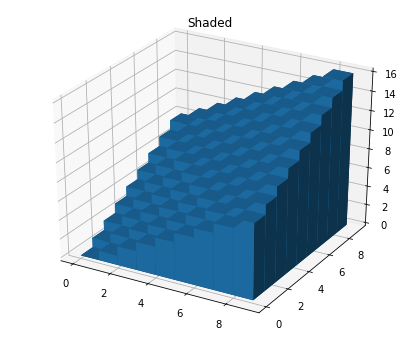

In [138]:
from mpl_toolkits.mplot3d import Axes3D 

def f():
    Z = []

    for x in range(9):
        temp_grid = []
        for y in range(9):
            #print(f"({x},{y})")
            temp_grid.append(np.sum(count_stat[0][y][8-x]))
            
        #print(temp_grid)
        Z.append(temp_grid)
    return Z

x = [i for i in range(9)] #np.linspace(0, 9, 1)
y = [i for i in range(9)] #np.linspace(0, 9, 1)


_xx, _yy = np.meshgrid(x, y)
x, y = _xx.ravel(), _yy.ravel()
Z = f()

fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121, projection='3d')
top = x + y
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')
plt.show()

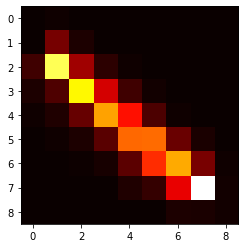

In [139]:
plt.imshow(Z, cmap='hot', interpolation='nearest')
plt.show()

In [74]:
z_survey=[[14 for i in range(9)],
        [11 for i in range(9)],
        [8 for i in range(9)],
        [4 for i in range(9)],
        [6 for i in range(9)],
        [12 for i in range(9)],
    [28 for i in range(9)],
    [21 for i in range(9)],
    [18 for i in range(9)]]
z_survey

[[14, 14, 14, 14, 14, 14, 14, 14, 14],
 [11, 11, 11, 11, 11, 11, 11, 11, 11],
 [8, 8, 8, 8, 8, 8, 8, 8, 8],
 [4, 4, 4, 4, 4, 4, 4, 4, 4],
 [6, 6, 6, 6, 6, 6, 6, 6, 6],
 [12, 12, 12, 12, 12, 12, 12, 12, 12],
 [28, 28, 28, 28, 28, 28, 28, 28, 28],
 [21, 21, 21, 21, 21, 21, 21, 21, 21],
 [18, 18, 18, 18, 18, 18, 18, 18, 18]]

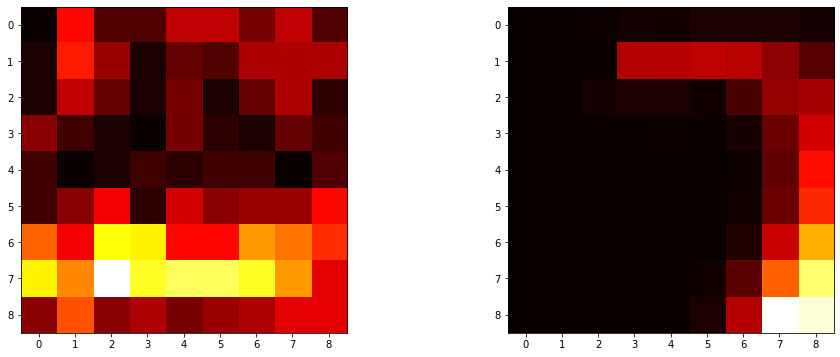

In [129]:
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(new_matrix, cmap='hot', interpolation='nearest')
ax2.imshow(Z, cmap='hot', interpolation='nearest')
plt.show()

In [78]:
from numpy import genfromtxt
my_data = genfromtxt('survey.csv', delimiter=';')

In [100]:
my_data[122][82].is_integer()

False

In [140]:
matrix_from_survey = np.zeros((81, 8))
Directions.ALL_DIRECTIONS

[LEFT, RIGHT, UP, DOWN, UP_LEFT, UP_RIGHT, DOWN_LEFT, DOWN_RIGHT]

In [191]:
matrix_from_survey

array([[ 0.,  7.,  2.,  0.,  0.,  5.,  0.,  0.],
       [ 1.,  5.,  8.,  0.,  0.,  0.,  0.,  0.],
       [ 5.,  3.,  5.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  9.,  2.,  0.,  2.,  0.,  0.,  0.],
       [ 2.,  7.,  4.,  0.,  1.,  0.,  0.,  0.],
       [ 3.,  5.,  3.,  0.,  2.,  1.,  0.,  0.],
       [ 5.,  5.,  2.,  0.,  1.,  1.,  0.,  0.],
       [ 2.,  4.,  3.,  0.,  3.,  2.,  0.,  0.],
       [ 5.,  0.,  5.,  0.,  4.,  0.,  0.,  0.],
       [ 0.,  1.,  3.,  2.,  0.,  4.,  0.,  1.],
       [ 1.,  0.,  8.,  1.,  0.,  1.,  0.,  0.],
       [ 5.,  0.,  5.,  1.,  0.,  0.,  0.,  0.],
       [ 3.,  0.,  1.,  3.,  2.,  1.,  1.,  0.],
       [ 0.,  1.,  6.,  2.,  0.,  0.,  0.,  2.],
       [ 1.,  6.,  1.,  1.,  1.,  1.,  0.,  0.],
       [ 1.,  2.,  4.,  1.,  1.,  2.,  0.,  0.],
       [ 0.,  4.,  4.,  2.,  0.,  1.,  0.,  0.],
       [ 2.,  0.,  3.,  4.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  6.,  1.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  5.,  0.,  1.,  1.,  0.,  0.],
       [ 3.,  1.,  2

In [118]:
def compute_next_state(state,action):
    next_p = n.world.p_transition[state,:,action]
    next_s = range(c.world.n_states)
    next_state = np.random.choice(next_s, p=next_p)
    return next_state

In [224]:
def policy_survey(state):
    #print(state)
    action = random.choice(np.argwhere(matrix_from_survey[state] == np.amax(matrix_from_survey[state])))[0]
    return action

def policy_stochastic_survey(state):
    #print(matrix_from_survey[state])
    action = np.random.choice(range(8), p=matrix_from_survey[state]/np.sum(matrix_from_survey[state]))
    #action = random.choice(np.argwhere(matrix_from_survey[state] == np.amax(matrix_from_survey[state])))[0]
    return action

In [212]:
matrix_from_survey = np.zeros((81, 8))

for row in my_data[1:]:
    for index,action in enumerate(row):
        if action.is_integer():
            #next_s = compute_next_state(index-1,int(action-1))
            #print(index-1,action-1)
            matrix_from_survey[index-1][int(action-1)] += 1

print(matrix_from_survey)

[[ 0.  7.  2.  0.  0.  5.  0.  0.]
 [ 1.  5.  8.  0.  0.  0.  0.  0.]
 [ 5.  3.  5.  0.  1.  0.  0.  0.]
 [ 1.  9.  2.  0.  2.  0.  0.  0.]
 [ 2.  7.  4.  0.  1.  0.  0.  0.]
 [ 3.  5.  3.  0.  2.  1.  0.  0.]
 [ 5.  5.  2.  0.  1.  1.  0.  0.]
 [ 2.  4.  3.  0.  3.  2.  0.  0.]
 [ 5.  0.  5.  0.  4.  0.  0.  0.]
 [ 0.  1.  3.  2.  0.  4.  0.  1.]
 [ 1.  0.  8.  1.  0.  1.  0.  0.]
 [ 5.  0.  5.  1.  0.  0.  0.  0.]
 [ 3.  0.  1.  3.  2.  1.  1.  0.]
 [ 0.  1.  6.  2.  0.  0.  0.  2.]
 [ 1.  6.  1.  1.  1.  1.  0.  0.]
 [ 1.  2.  4.  1.  1.  2.  0.  0.]
 [ 0.  4.  4.  2.  0.  1.  0.  0.]
 [ 2.  0.  3.  4.  1.  0.  1.  0.]
 [ 0.  0.  6.  1.  0.  1.  0.  0.]
 [ 1.  0.  5.  0.  1.  1.  0.  0.]
 [ 3.  1.  2.  0.  1.  1.  0.  0.]
 [ 1.  1.  1.  1.  0.  4.  0.  0.]
 [ 1.  1.  3.  0.  2.  0.  1.  0.]
 [ 1.  2.  2.  1.  1.  0.  1.  0.]
 [ 0.  4.  2.  1.  1.  0.  0.  0.]
 [ 0.  1.  4.  1.  0.  2.  0.  0.]
 [ 2.  0.  4.  1.  0.  0.  1.  0.]
 [ 0.  0.  3.  1.  0.  0.  0.  0.]
 [ 0.  0.  2.  1.  0

In [128]:
new_matrix = np.reshape(matrix_from_survey, (9,9))

In [138]:
n.world.p_transition[80,:,0]

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0125, 0.0125,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.9125,
       0.0625])

In [213]:
print(matrix_from_survey[7], Directions.ALL_DIRECTIONS, np.argmax(matrix_from_survey[7]))
Directions.ALL_DIRECTIONS

random.choice(np.argwhere(matrix_from_survey[7] == np.amax(matrix_from_survey[7])))[0]

[2. 4. 3. 0. 3. 2. 0. 0.] [LEFT, RIGHT, UP, DOWN, UP_LEFT, UP_RIGHT, DOWN_LEFT, DOWN_RIGHT] 1


1

In [220]:
print(policy_survey(matrix_from_survey[8]))
print(policy_stochastic_survey(matrix_from_survey[8]))

[5. 0. 5. 0. 4. 0. 0. 0.]
0
[5. 0. 5. 0. 4. 0. 0. 0.]
2


{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x10baa41d0>}


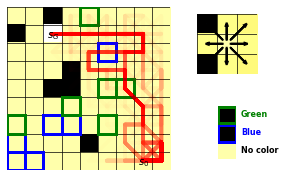

In [225]:
import max_ent.gridworld.trajectory as T
from max_ent.algorithms.gridworld_icrl import Demonstration

demo_optimal_survey = T.generate_trajectories(200, n.world, policy_survey, n.start, n.terminal)
demo_optimal_survey = Demonstration(demo_optimal_survey, policy_survey)
f1 = G.plot_world(f'MCA', c, c_cfg.state_penalties, 
              c_cfg.action_penalties, c_cfg.color_penalties, 
              demo_optimal_survey, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)

{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x10baa41d0>}


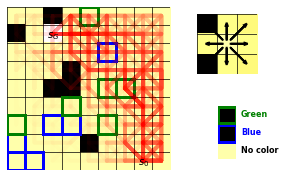

In [226]:

demo_stochastic_survey = T.generate_trajectories(200, n.world, policy_stochastic_survey, n.start, n.terminal)
demo_stochastic_survey = Demonstration(demo_stochastic_survey, policy_stochastic_survey)
f1 = G.plot_world(f'MCA', c, c_cfg.state_penalties, 
              c_cfg.action_penalties, c_cfg.color_penalties, 
              demo_stochastic_survey, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)

In [20]:
n.world.p_transition.shape

(81, 81, 8)

In [140]:
Z

[[0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 33.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [16.0, 169.0, 46.0, 11.0, 2.0, 0.0, 0.0, 0.0, 0.0],
 [6.0, 21.0, 150.0, 62.0, 16.0, 3.0, 0.0, 0.0, 0.0],
 [2.0, 7.0, 28.0, 124.0, 79.0, 20.0, 2.0, 0.0, 0.0],
 [0.0, 2.0, 6.0, 24.0, 106.0, 107.0, 29.0, 5.0, 0.0],
 [0.0, 0.0, 1.0, 4.0, 25.0, 88.0, 126.0, 34.0, 2.0],
 [0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 68.0, 204.0, 3.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 5.0, 3.0]]

In [142]:
Z_distr = Z
print(int(start%9))
Z_distr[8-int(start/9)][int(start%9)] = 0
Z_distr[8-int(goal/9)][int(goal%9)] = 0

Z_distr

7


[[0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0, 33.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [16.0, 169.0, 46.0, 11.0, 2.0, 0.0, 0.0, 0.0, 0.0],
 [6.0, 21.0, 150.0, 62.0, 16.0, 3.0, 0.0, 0.0, 0.0],
 [2.0, 7.0, 28.0, 124.0, 79.0, 20.0, 2.0, 0.0, 0.0],
 [0.0, 2.0, 6.0, 24.0, 106.0, 107.0, 29.0, 5.0, 0.0],
 [0.0, 0.0, 1.0, 4.0, 25.0, 88.0, 126.0, 34.0, 2.0],
 [0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 68.0, 0, 3.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 5.0, 3.0]]

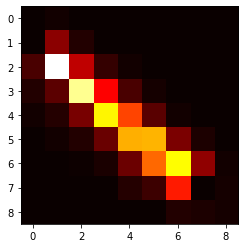

In [143]:
plt.imshow(Z_distr, cmap='hot', interpolation='nearest')
plt.show()

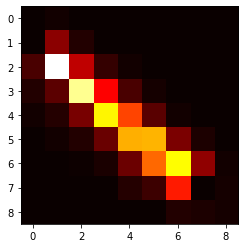

In [145]:
from scipy.special import softmax

np.set_printoptions(precision=3)
'''Z_distr = Z
Z_distr = np.array(Z_distr)
Z_distr = Z_distr + 1E-3'''
plt.imshow(distr, cmap='hot', interpolation='nearest')
plt.show()

#Z_distr/np.sum(Z_distr)


In [157]:
#distr = np.array(Z_distr/np.sum(Z_distr))

new_distr = []
for i in range(len(distr)):
    new_distr.append(distr[len(distr)-i-1])

print(distr)

print(new_distr)

new_distr = np.array(new_distr)

[[0.    0.001 0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.022 0.004 0.    0.    0.    0.    0.    0.   ]
 [0.011 0.115 0.031 0.007 0.001 0.    0.    0.    0.   ]
 [0.004 0.014 0.102 0.042 0.011 0.002 0.    0.    0.   ]
 [0.001 0.005 0.019 0.084 0.054 0.014 0.001 0.    0.   ]
 [0.    0.001 0.004 0.016 0.072 0.073 0.02  0.003 0.   ]
 [0.    0.    0.001 0.003 0.017 0.06  0.086 0.023 0.001]
 [0.    0.    0.    0.    0.005 0.009 0.046 0.    0.002]
 [0.    0.    0.    0.    0.    0.    0.004 0.003 0.002]]
[array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.004, 0.003, 0.002]), array([0.   , 0.   , 0.   , 0.   , 0.005, 0.009, 0.046, 0.   , 0.002]), array([0.   , 0.   , 0.001, 0.003, 0.017, 0.06 , 0.086, 0.023, 0.001]), array([0.   , 0.001, 0.004, 0.016, 0.072, 0.073, 0.02 , 0.003, 0.   ]), array([0.001, 0.005, 0.019, 0.084, 0.054, 0.014, 0.001, 0.   , 0.   ]), array([0.004, 0.014, 0.102, 0.042, 0.011, 0.002, 0.   , 0.   , 0.   ]), array([0.011, 0.115, 0.031, 0.007, 0.001, 0.   , 0.  

[39 40 47 55 46 33]
[0.962 0.062 0.062 0.962 0.962 0.062 0.962 0.963]
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x1103bf400>}


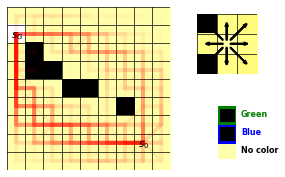

In [173]:
cs = np.random.choice(np.arange(0,81), replace=False, p = new_distr.flatten(), size=6)
blue = []
green =[]
print(cs)
c, c_cfg, demo_c, f2 = create_world('Constrained', blue, green, cs, ca, cc, start=start, goal=goal, check=True)

In [171]:
np.set_printoptions(precision=3)
print(distr)

[[0.    0.001 0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.022 0.004 0.    0.    0.    0.    0.    0.   ]
 [0.011 0.115 0.031 0.007 0.001 0.    0.    0.    0.   ]
 [0.004 0.014 0.102 0.042 0.011 0.002 0.    0.    0.   ]
 [0.001 0.005 0.019 0.084 0.054 0.014 0.001 0.    0.   ]
 [0.    0.001 0.004 0.016 0.072 0.073 0.02  0.003 0.   ]
 [0.    0.    0.001 0.003 0.017 0.06  0.086 0.023 0.001]
 [0.    0.    0.    0.    0.005 0.009 0.046 0.    0.002]
 [0.    0.    0.    0.    0.    0.    0.004 0.003 0.002]]


In [147]:
distr.flatten()

array([0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.022, 0.004, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.011, 0.115, 0.031, 0.007, 0.001, 0.   , 0.   , 0.   , 0.   ,
       0.004, 0.014, 0.102, 0.042, 0.011, 0.002, 0.   , 0.   , 0.   ,
       0.001, 0.005, 0.019, 0.084, 0.054, 0.014, 0.001, 0.   , 0.   ,
       0.   , 0.001, 0.004, 0.016, 0.072, 0.073, 0.02 , 0.003, 0.   ,
       0.   , 0.   , 0.001, 0.003, 0.017, 0.06 , 0.086, 0.023, 0.001,
       0.   , 0.   , 0.   , 0.   , 0.005, 0.009, 0.046, 0.   , 0.002,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.004, 0.003, 0.002])

In [150]:
np.arange(0,81)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])

In [111]:
a.T

array([[1, 3],
       [2, 4]])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])